# Titanic

## Part I: Exploratory Analysis

In this notebook we'll explore the training data of Titanic dataset available on [Kaggle](https://www.kaggle.com/c/titanic).

In [Part II](./titanic-part2.ipynb) we'll deal with feature engineering and data preparation for machine learning.

> The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. 

Table of contents:

* [Imports and settings](#Imports-and-settings)
* [Univariate analysis](#Univariate-analysis)
* [Multivariate analysis](#Multivariate-analysis)

## Imports and settings

Importing and checking that everything loaded ok.

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.rcParams['font.size'] = 12
plt.rcParams['figure.titlesize'] = 16
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams["axes.labelsize"] = 13
plt.rcParams["axes.labelweight"] = 'bold'
plt.rcParams["xtick.labelsize"] = 11
plt.rcParams["ytick.labelsize"] = 11

In [3]:
df = pd.read_csv('./datasets/titanic-train.csv', index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Univariate analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
df.dropna().describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [6]:
df.select_dtypes(include=['object']).dropna().describe()

,Name,Sex,Ticket,Cabin,Embarked
count,202,202,202,202,202
unique,202,2,141,146,3
top,"McGough, Mr. James Robert",male,19950,C23 C25 C27,S
freq,1,107,4,4,129


### Survived

In [7]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### Class

In [8]:
df['Pclass'].value_counts(sort=False)

1    216
2    184
3    491
Name: Pclass, dtype: int64

### Name / Title

We will extract titles from the `name` column, and create a new column with them.

In [9]:
def extract_title(full_name):
    return full_name.split(',')[1].split('.')[0].strip()

all_titles = np.unique(df.Name.map(extract_title))
all_titles

array(['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master',
       'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir',
       'the Countess'], dtype=object)

In [10]:
titles = {
    "Capt":        "Officer", 
    "Col":         "Officer",
    "Major":       "Officer", 
    "Dr":          "Officer",
    "Rev":         "Officer",
    "Jonkheer":    "Mr", 
    "Don":         "Mr", 
    "Sir" :        "Mr", 
    "Mr" :         "Mr",
    "Mlle":        "Miss",
    "Miss" :       "Miss",
    "the Countess":"Miss",
    "Dona":        "Miss", 
    "Lady" :       "Mrs",     
    "Mme":         "Mrs",
    "Mrs" :        "Mrs",
    "Ms":          "Mrs",
    "Master" :     "Master",
} 

df['Title'] = df.Name.map(lambda x: titles[extract_title(x)])

### Age

**Lots of missing values!!**

In [11]:
df['Age'].value_counts(dropna=False)[:20]

NaN      177
 24.0     30
 22.0     27
 18.0     26
 30.0     25
 19.0     25
 28.0     25
 21.0     24
 25.0     23
 36.0     22
 29.0     20
 35.0     18
 32.0     18
 26.0     18
 27.0     18
 16.0     17
 31.0     17
 23.0     15
 33.0     15
 34.0     15
 20.0     15
Name: Age, dtype: int64

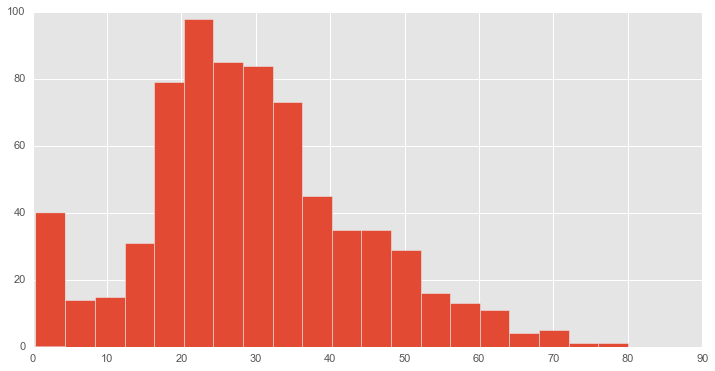

In [12]:
df['Age'].hist(bins=20)

### Siblings

In [13]:
df['SibSp'].value_counts(sort=False)

0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64

### Parents / childs

In [14]:
df['Parch'].value_counts(sort=False)

0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64

### Fare

In [15]:
df['Fare'].value_counts().head(20)

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
10.5000    24
7.9250     18
7.7750     16
26.5500    15
7.2292     15
0.0000     15
7.2500     13
7.8542     13
8.6625     13
7.2250     12
9.5000      9
16.1000     9
24.1500     8
15.5000     8
56.4958     7
Name: Fare, dtype: int64

### Gender

In [16]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

### Ticket

In [17]:
df['Ticket'].value_counts()[:20]

347082          7
CA. 2343        7
1601            7
CA 2144         6
347088          6
3101295         6
S.O.C. 14879    5
382652          5
W./C. 6608      4
4133            4
2666            4
349909          4
19950           4
PC 17757        4
LINE            4
347077          4
113781          4
113760          4
17421           4
PC 17755        3
Name: Ticket, dtype: int64

### Cabin

**Lots of missing values!!**

In [18]:
df['Cabin'].value_counts(dropna=False)[:20]

NaN            687
B96 B98          4
C23 C25 C27      4
G6               4
F2               3
C22 C26          3
E101             3
F33              3
D                3
B49              2
B35              2
C126             2
C83              2
B28              2
D36              2
C2               2
F G73            2
E121             2
C125             2
E44              2
Name: Cabin, dtype: int64

### Embarked

In [19]:
df['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

## Multivariate analysis

### Survival rate between sexes and classes

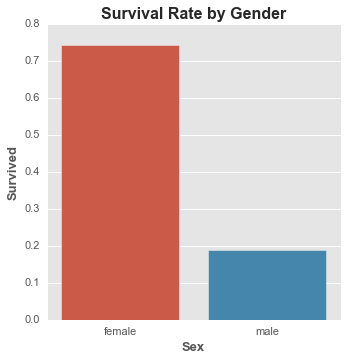

In [21]:
sns.factorplot(x='Sex', y='Survived', data=df, kind='bar', size=5, ci=None, order=['female', 'male'])
plt.title('Survival Rate by Gender')

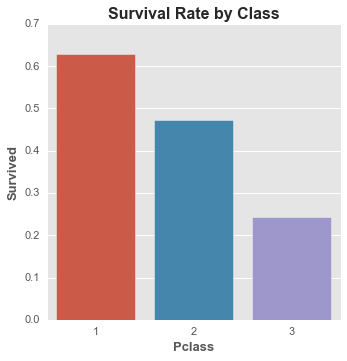

In [22]:
sns.factorplot(x='Pclass', y='Survived', data=df, kind='bar', size=5, ci=None)
plt.title('Survival Rate by Class')

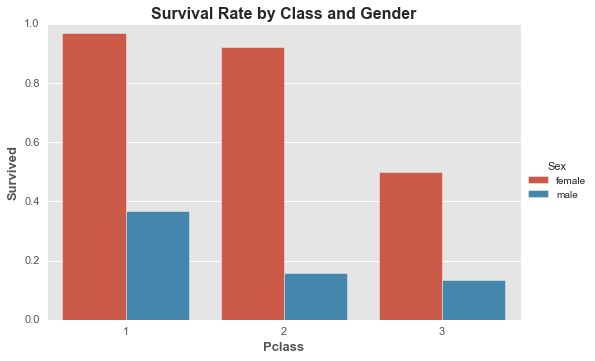

In [23]:
sns.factorplot(x='Pclass', y='Survived', hue='Sex', data=df, kind='bar', 
               hue_order=['female', 'male'], size=5, aspect=1.5, ci=None)
plt.title('Survival Rate by Class and Gender')

### Survival rate by age

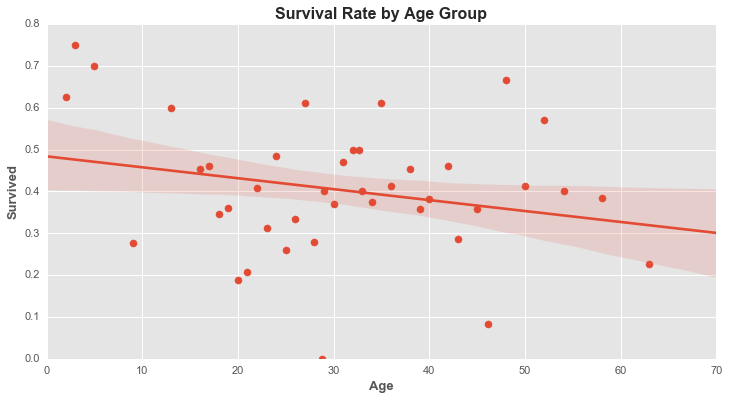

In [24]:
sns.regplot(x='Age', y='Survived', data=df, x_bins=50, x_ci=None)
plt.xlim(0, None)
plt.ylim(0, None)
plt.title('Survival Rate by Age Group')

### Family on Titanic

We'll combine two columns: `SibSp` and `Parch` to get total number of family members on the ship.

In [25]:
df['family'] = df['SibSp'] + df['Parch']
df['family'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: family, dtype: int64

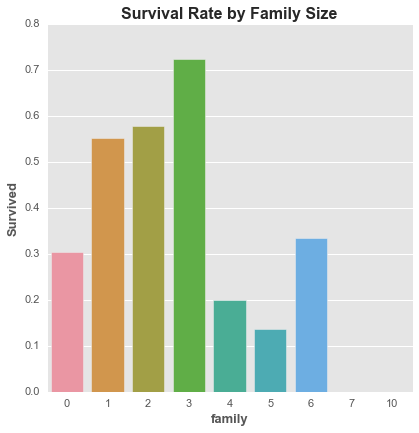

In [26]:
sns.factorplot(x='family', y='Survived', data=df, kind='bar', size=6, ci=None)
plt.title('Survival Rate by Family Size')

### Embarkment

- S - Southampton
- C - Cherbourg
- Q - Queenstown

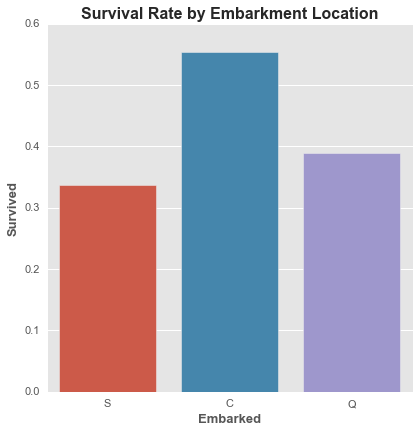

In [27]:
sns.factorplot(x='Embarked', y='Survived', data=df, kind='bar', size=6, ci=None)
plt.title('Survival Rate by Embarkment Location')

Why Cherbourg has higher survival rate? Let's explore passengers' gender and class for each embarkment location:

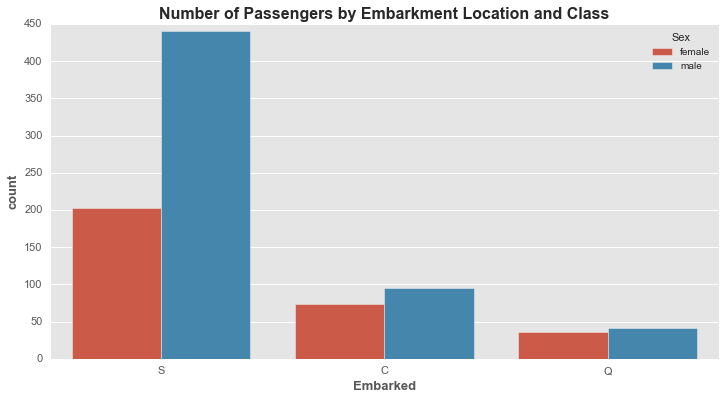

In [28]:
sns.countplot(x='Embarked', hue='Sex', hue_order=['female', 'male'], data=df)
plt.title('Number of Passengers by Embarkment Location and Class')

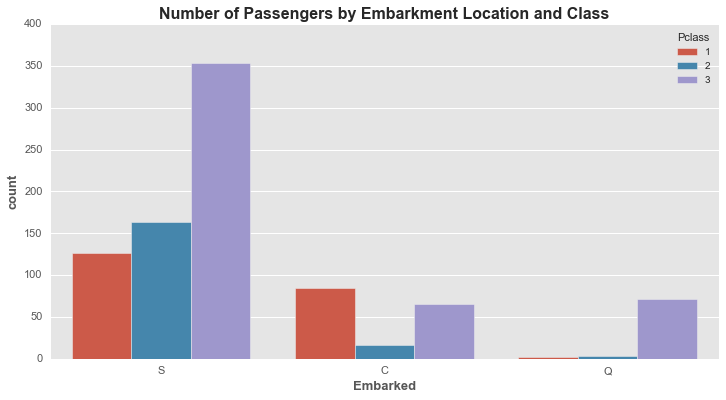

In [29]:
sns.countplot(x='Embarked', hue='Pclass', data=df)
plt.title('Number of Passengers by Embarkment Location and Class')

Passengers from Southampton were mostly male and mostly travelled in 3rd class, and we've seen earlier males in general had much lower survival rate than females.  
Majority of passengers from Queenstown were 3rd class passengers, and we've seen earlier that 3rd class passengers had lower survival rate than passengers in first two classes.

Passengers from Cherbourg had better both gender and class split, increasing their survival rates.

### Survival rate by title

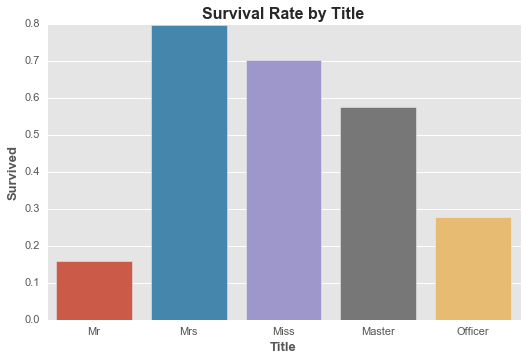

In [30]:
sns.factorplot(x='Title', y='Survived', data=df, kind='bar', size=5, aspect=1.5, ci=None)
plt.title('Survival Rate by Title')

### Survival rate by fare

[None, (1.0, 1000.0)]

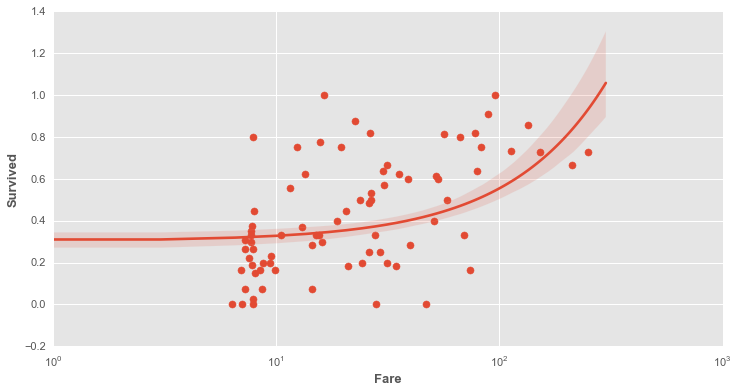

In [31]:
ax = sns.regplot(x='Fare', y='Survived', data=df, x_bins=100, x_ci=None)
ax.set(xscale="log", xlim=(1e0, 1e3))

The more you pay, the higher the chances. Probably has to do with different prices for different classes:

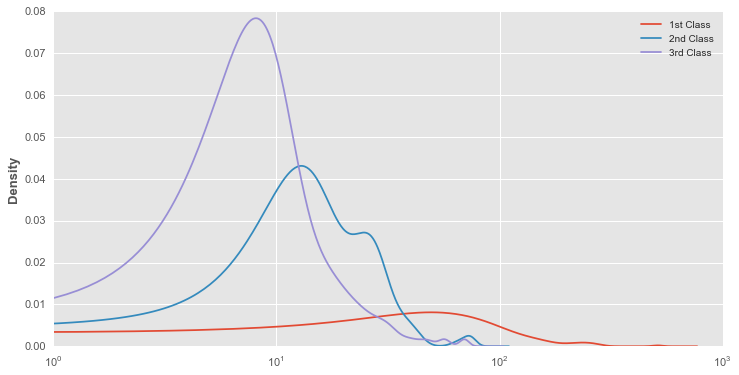

In [32]:
for pclass in [1, 2, 3]:
    ax = df[df['Pclass'] == pclass]['Fare'].plot.kde()
ax.set(xscale="log", xlim=(1e0, 1e3))
plt.legend(('1st Class', '2nd Class', '3rd Class'))

&nbsp;

&nbsp;



#### Notebook Style

In [1]:
from IPython.core.display import HTML
def css_styling(): 
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()